<a href="https://colab.research.google.com/github/Pravallika-02-datascience/Supervised-Machine-Learning-Algorithms/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -----------------------------------------------------------
# Random Forest Classification – Glass Dataset
# -----------------------------------------------------------
# This script follows **each step** in brief:
#   1. Exploratory Data Analysis (EDA)
#   2. Data Visualisation
#   3. Data Pre‑processing
#   4. Train/Test split
#   5. Baseline Random Forest
#   6. Hyperparameter Tuning
#   7. Evaluation & Feature Importance
#
# -----------------------------------------------------------

# 1️⃣  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2️⃣  Load dataset – auto‑detect the sheet with tabular data
DATA_PATH = "glass.xlsx"   # <-- modify if your path differs
PREFERRED_SHEETS = ["glass", "Glass", "data", "Sheet1"]

xls = pd.ExcelFile(DATA_PATH)
chosen_sheet = None
for s in PREFERRED_SHEETS:
    if s in xls.sheet_names:
        chosen_sheet = s
        break
if chosen_sheet is None:
    # Fallback: pick first sheet that has > 10 columns and > 100 rows
    for s in xls.sheet_names:
        tmp = xls.parse(s)
        if tmp.shape[0] > 100 and tmp.shape[1] > 5:
            chosen_sheet = s
            break
# Final fallback: first sheet
if chosen_sheet is None:
    chosen_sheet = xls.sheet_names[0]

print(f"Reading sheet: {chosen_sheet}")
df = xls.parse(chosen_sheet)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Reading sheet: glass
Shape: (214, 10)
Columns: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


In [3]:
# 3️⃣  Exploratory Data Analysis (EDA)
print("\n--- INFO ---")
df.info()
print("\n--- DESCRIBE ---")
print(df.describe().T)

print("\nMissing values per column:\n", df.isnull().sum())


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

--- DESCRIBE ---
      count       mean       std       min        25%       50%        75%  \
RI    214.0   1.518365  0.003037   1.51115   1.516522   1.51768   1.519157   
Na    214.0  13.407850  0.816604  10.73000  12.907500  13.30000  13.825000   
Mg    214.0   2.684533  1.442408   0.00000   2.115000   3.48000   3.600000   
Al    214.0   1.444907  0.499270   0.29000   1.190000   

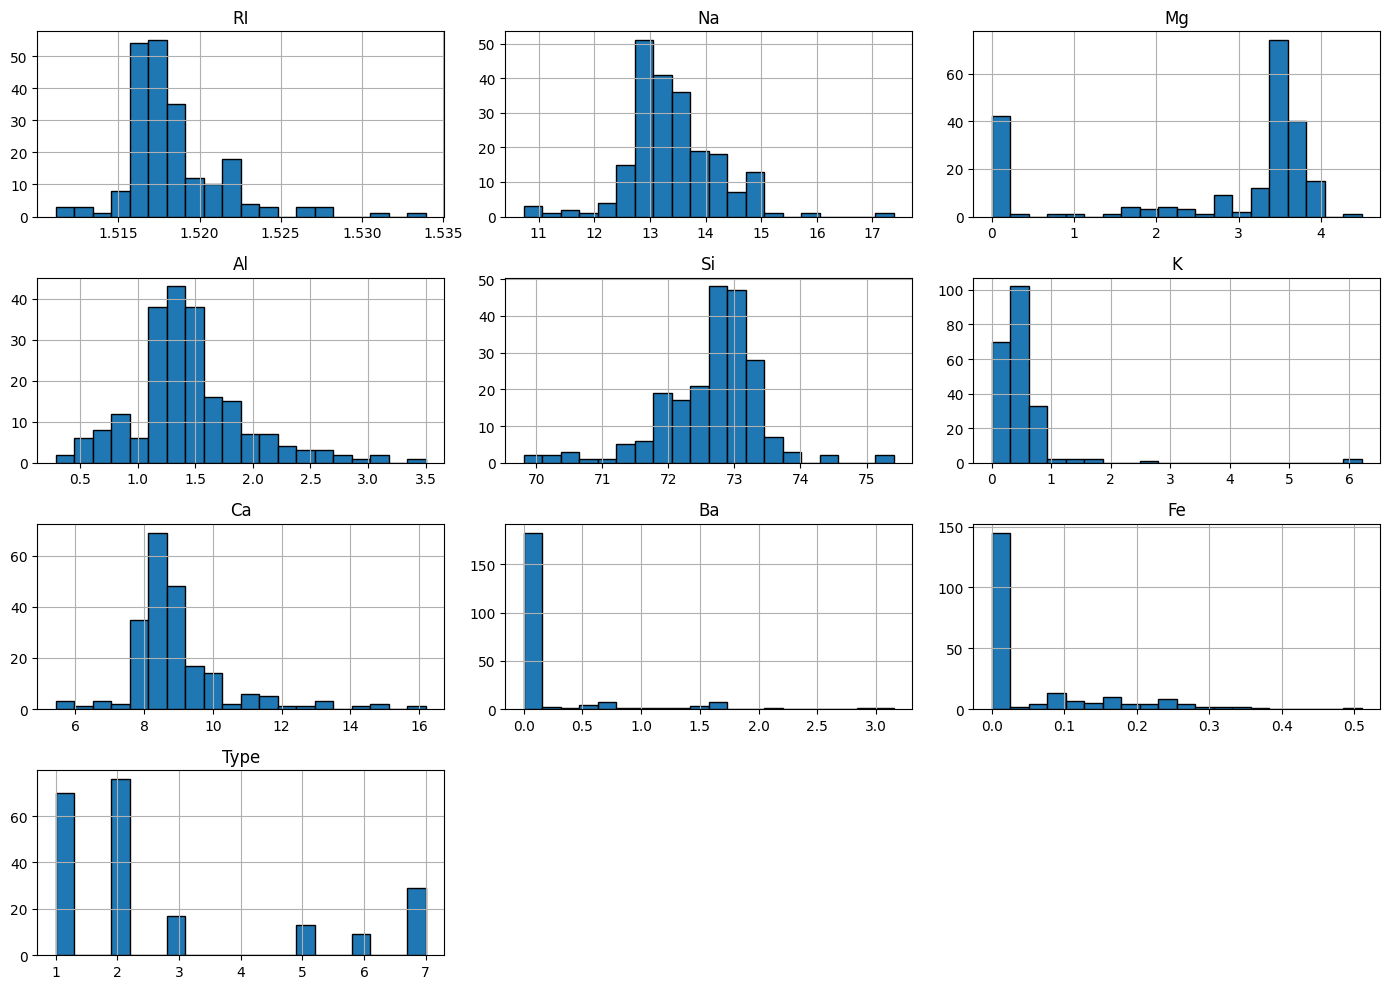

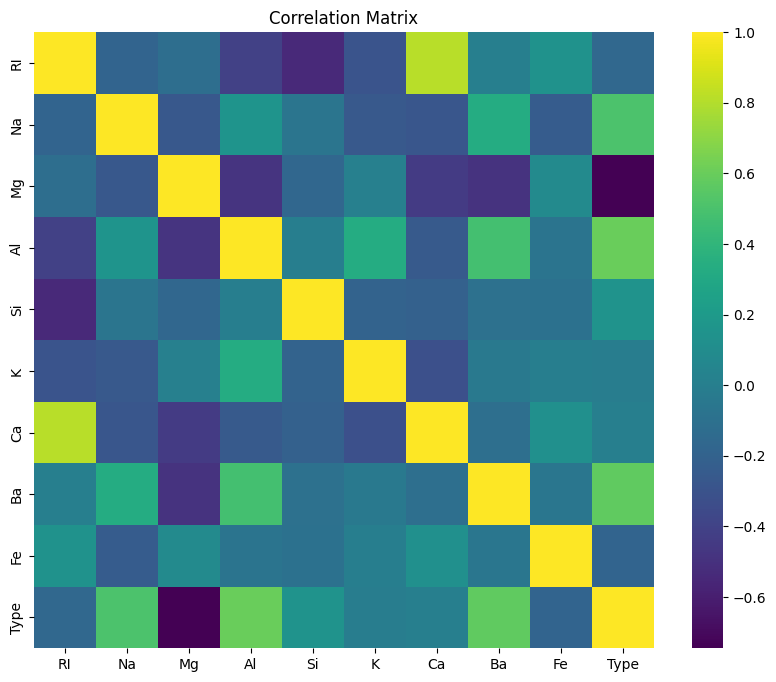

In [4]:
# 4️⃣  Data Visualisation
# Histograms
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols):
    df[num_cols].hist(bins=20, figsize=(14, 10), edgecolor="black")
    plt.tight_layout()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [5]:
# 5️⃣  Data Pre‑processing
# No categorical columns in glass dataset; ensure numeric types
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Impute any remaining NaNs with median
for col in df.columns:
    if df[col].dtype.kind in ["i", "f"]:
        df[col].fillna(df[col].median(), inplace=True)

# 6️⃣  Feature / Target split
TARGET_CANDIDATES = ["Type", "target", "class"]

target_col = None
for t in TARGET_CANDIDATES:
    if t in df.columns:
        target_col = t
        break
if target_col is None:
    raise ValueError("Target column not found. Please rename 'Type' or set target_col manually.")

X = df.drop(columns=[target_col])
y = df[target_col]
print("\nFeatures shape:", X.shape, "  Target unique classes:", y.unique())


Features shape: (214, 9)   Target unique classes: [1 2 3 5 6 7]


In [6]:
# 7️⃣  Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# 8️⃣  Baseline Random Forest
baseline_model = RandomForestClassifier(random_state=42, n_estimators=100)
baseline_model.fit(X_train, y_train)
base_pred = baseline_model.predict(X_test)
print("\nBaseline Accuracy:", round(accuracy_score(y_test, base_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, base_pred))
print("Classification Report:\n", classification_report(y_test, base_pred))


Baseline Accuracy: 0.8372
Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



In [8]:
# 9️⃣  Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid.fit(X_train, y_train)
print("\nBest Params:", grid.best_params_)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)
print("\nTuned Accuracy:", round(accuracy_score(y_test, best_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_pred))
print("Classification Report:\n", classification_report(y_test, best_pred))



Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Accuracy: 0.8372
Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



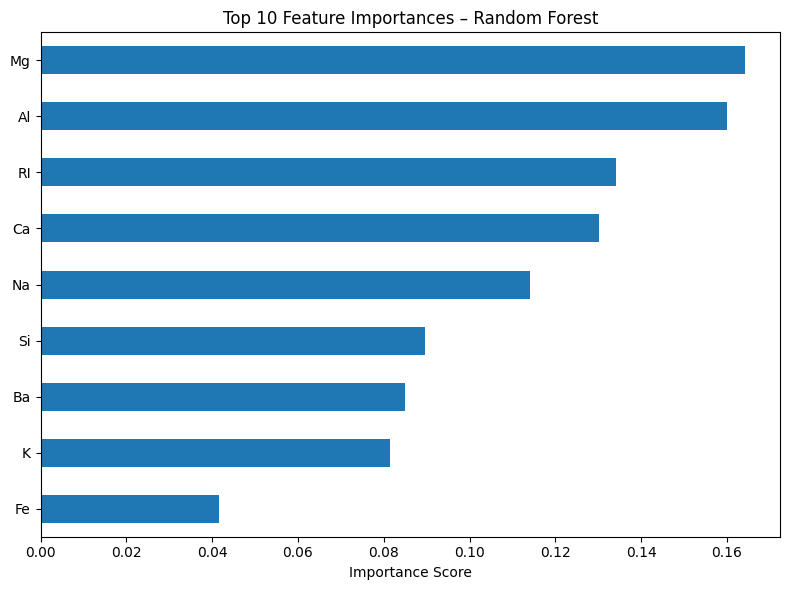

In [9]:
# 🔟  Feature Importance Plot
importances = pd.Series(best_model.feature_importances_, index=X.columns)
imp_top = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
imp_top.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances – Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
